># Building a Linear Regression Model to predict the Weight of a fish depending upon it's type , different dimensional lenghth and it's width

In [66]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
plt.rcParams['figure.figsize'] = (18,6)

>Importing the dataset in data variable

In [117]:
data=pd.read_csv("Fish_dataset.csv")

In [68]:
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


>Checking the frequency of fishes in different Species in dataset

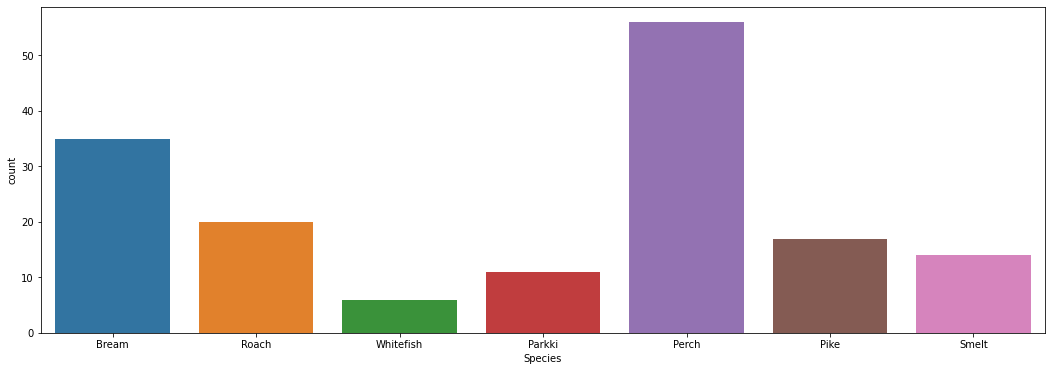

In [71]:
sns.countplot(data=data,x="Species")

>Checking the outlier value in our Dataset

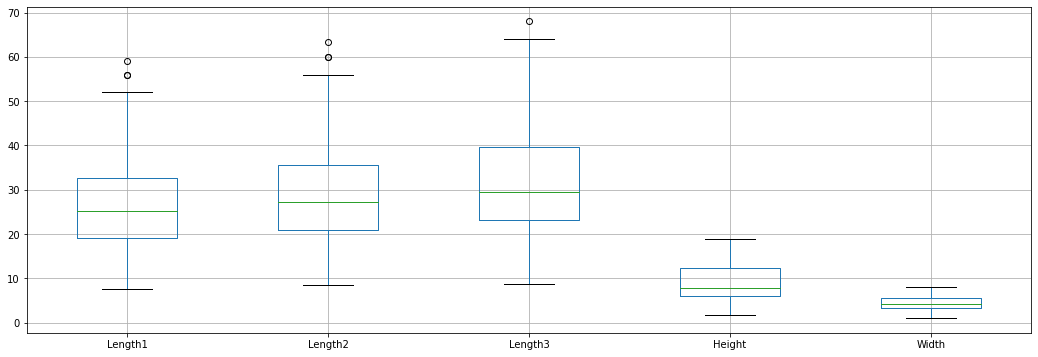

In [70]:
data.drop("Weight",axis=1).boxplot()

>Visualization of correlation matrix using heatmap

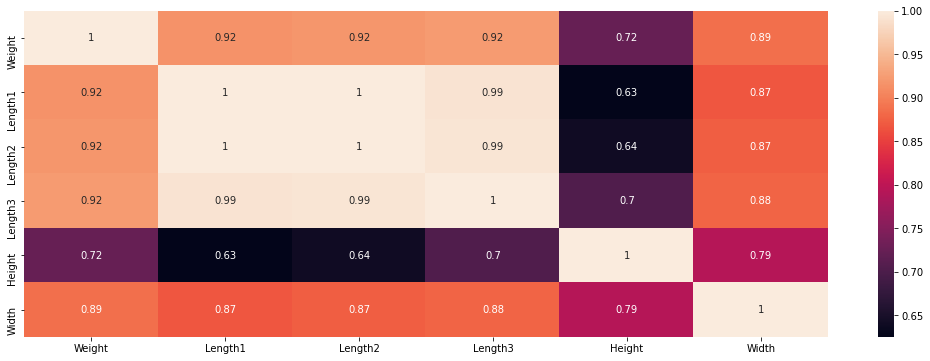

In [120]:
sns.heatmap(data.drop("Species",axis=1).corr(),annot=True)

Peforming Preprocessing of the data

In [72]:
data['z_score']=stats.zscore(data['Weight'])
y=data[data["z_score"]>=3].index
data.drop(y,inplace=True) # to eliminate the outliers in wieght
data[data["z_score"]>=3]

,Species,Weight,Length1,Length2,Length3,Height,Width,z_score


In [73]:
df=pd.get_dummies(data["Species"])# dummies for species

In [74]:
data=pd.concat([data,df],axis=1)

In [75]:
data.drop(["Species","z_score"],inplace=True,axis=1)

In [76]:
data.describe()


,Weight,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,375.217308,25.655769,27.786538,30.571154,8.951128,4.375719,0.224359,0.070513,0.358974,0.089744,0.128205,0.089744,0.038462
std,319.546978,9.119630,9.792651,10.695359,4.324325,1.672188,0.418503,0.256834,0.481245,0.286735,0.335395,0.286735,0.192927
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,19.000000,21.000000,23.025000,5.931675,3.369600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,271.000000,25.000000,26.750000,29.250000,7.647800,4.243300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,612.500000,32.125000,35.000000,39.425000,12.378550,5.424375,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1250.000000,52.000000,56.000000,59.700000,18.957000,8.142000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


>Splitting the data in 70% and 30% for training and testing

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x=data.copy()
y=data["Weight"].copy()
x.drop("Weight",inplace=True,axis=1)

In [96]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(x,y,random_state=14,test_size=0.3)

In [103]:
Xtrain[0:5]

,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
141,52.0,56.0,59.7,10.6863,6.9849,0,0,0,1,0,0,0
53,25.0,27.0,30.6,8.5680,4.7736,0,0,0,0,1,0,0
15,29.4,32.0,37.2,15.4380,5.5800,1,0,0,0,0,0,0
157,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,0,1,0
95,21.5,23.5,25.0,6.2750,3.7250,0,0,1,0,0,0,0


>Standardizing the dataset on the basis of training data 

In [104]:
sc=StandardScaler()
Xtrain=sc.fit_transform(Xtrain)

In [105]:
Xtrain[0:5]

array([[ 2.85970566,  2.85320345,  2.69163206,  0.42007584,  1.60991979,
        -0.53136893, -0.28143902, -0.76138699,  3.14642654, -0.3350297 ,
        -0.3350297 , -0.2192645 ],
       [-0.04150216, -0.04968242,  0.0330241 , -0.06276248,  0.28592179,
        -0.53136893, -0.28143902, -0.76138699, -0.31782086,  2.98481003,
        -0.3350297 , -0.2192645 ],
       [ 0.43128727,  0.45081515,  0.63600735,  1.50316266,  0.76874727,
         1.88193163, -0.28143902, -0.76138699, -0.31782086, -0.3350297 ,
        -0.3350297 , -0.2192645 ],
       [-1.30943743, -1.32094623, -1.37393681, -1.36090757, -1.33451334,
        -0.53136893, -0.28143902, -0.76138699, -0.31782086, -0.3350297 ,
         2.98481003, -0.2192645 ],
       [-0.41758465, -0.40003071, -0.47859805, -0.58542133, -0.34191899,
        -0.53136893, -0.28143902,  1.31339255, -0.31782086, -0.3350297 ,
        -0.3350297 , -0.2192645 ]])

In [106]:
Xtest=sc.transform(Xtest)

>Building the Linear Regression model

In [107]:
le=LinearRegression()

In [108]:
le.fit(Xtrain,Ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [109]:
predy=le.predict(Xtest)


In [110]:
from sklearn.metrics import r2_score
acc=r2_score(Ytest,predy)

Checking accuracy of the Model

In [135]:
print("Our modell is",format(round(acc*100,1)),"% accurate")

Our modell is 95.2 % accurate


In [113]:
new_dataset=pd.DataFrame({'Ytest':Ytest,'Predy':predy})

>Plotting the graph of Predicted value with respect to Observed value

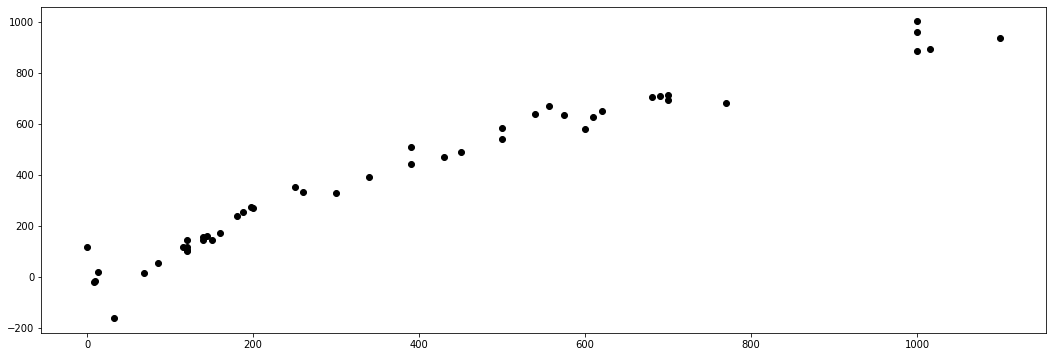

In [114]:
import matplotlib.pyplot as plt
plt.scatter(data=new_dataset,x="Ytest",y="Predy",color='black')